In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap



In [2]:
#technology = "microarray" # "RNAseq"
technology = "RNAseq" #microarray

In [3]:

# Assuming your DataFrame is called cts and has gene expression data
# Assuming cts is a pandas DataFrame with gene expression data
if technology == "microarray":
    cts = pd.read_csv("/home/karen/Documents/phd/Data/trainign_dataset_51270_microarray_unadjusted.csv")
elif technology == "RNAseq":
    cts = pd.read_csv("/home/karen/Documents/GitHub/Test_DEG_methods-single_cell/batch_correction/RNAseq_All_abundances_unadjusted.csv")

metadata =   cts[["Experiment", "Sample", "Age"]]


In [4]:
metadata

,Experiment,Sample,Age
0,GSE164471,SRR13388732,23.0
1,GSE164471,SRR13388733,28.0
2,GSE164471,SRR13388734,31.0
3,GSE164471,SRR13388735,31.0
4,GSE164471,SRR13388736,35.0
...,...,...,...
265,GSE129643,SRR8882198,27.0
266,GSE129643,SRR8882200,33.0
267,GSE129643,SRR8882202,37.0
268,GSE129643,SRR8882203,38.0


# Function

In [5]:
import matplotlib.pyplot as plt

def generate_colors(n):
        colormap = plt.cm.get_cmap('tab20', n)
        colors = [colormap(i) for i in range(n)]
        return colors
    
def blot_expression(subset_data, experiments, count_experiments, colors=None, title=None, save=False):
    
    if colors is None:
        colors = generate_colors(len(experiments))
    colored = np.sum(list(count_experiments.values()))
    if len(subset_data.columns) != colored:
        raise "the columns and the experiments should be same length"
        return None
    if len(count_experiments) != len(experiments):
        raise "the count_experiments and the experiments should be same length"
        return None
    if title is None:
        title = 'Expression of Gene Expression Across Experiments'
    boxes=[]
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))
    start_c = 0
    end_c = len(subset_data.columns)
    color_i = 0
    for exp in experiments:
        end_c=start_c + count_experiments[exp]
        # Boxplot for the first 84 columns
        box= ax.boxplot(subset_data.iloc[:, start_c:end_c], positions=list(range(start_c+1,end_c+1)), showfliers=False, patch_artist=True,
                          boxprops=dict(facecolor=colors[color_i], color=colors[color_i])
                          )
        start_c = end_c
        boxes.append(box)
        color_i=color_i+1
                          
    
    # Set labels and titles
    ax.set_title(title)
    ax.set_ylabel('Expression')
    
    # Adjust legend
    legends_list = [b["boxes"][0] for b in boxes]
    ax.legend(legends_list, experiments)
    
    plt.tight_layout()
    if save:
        plt.savefig(save)
    plt.show()


In [6]:
cts

,Sample,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.11,...,ENSG00000285472.1,ENSG00000285476.1,ENSG00000285480.1,ENSG00000285491.1,ENSG00000285505.1,ENSG00000285508.1,ENSG00000285509.1,Experiment,Age,Sample.1
0,SRR13388732,3.346531,0.000000,7.023940,0.705439,3.879328,0.275243,7.746350,6.574690,8.136232,...,0.311412,0.439481,0.000000,0.000000,0.000000,4.61464,0.142626,GSE164471,23.0,SRR13388732
1,SRR13388733,7.351350,0.000000,13.916237,4.891812,2.885359,0.190321,16.006573,6.498180,10.725815,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.80200,1.119540,GSE164471,28.0,SRR13388733
2,SRR13388734,7.671751,1.624510,18.720030,3.338030,9.629021,0.204143,19.061782,7.368540,11.420381,...,0.000000,0.167163,0.000000,0.418267,0.000000,2.37204,0.915094,GSE164471,31.0,SRR13388734
3,SRR13388735,2.547355,0.184514,6.876067,0.888782,1.684829,0.000000,3.182537,2.415355,2.242850,...,0.000000,0.148800,0.000000,0.000000,0.000000,5.20632,0.813373,GSE164471,31.0,SRR13388735
4,SRR13388736,15.728966,0.613411,14.120093,3.123864,10.457990,0.198544,12.340000,19.441760,18.223213,...,1.544910,1.069550,0.379249,0.000000,0.000000,3.39066,0.707502,GSE164471,35.0,SRR13388736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,SRR8882198,1.832683,0.000000,2.567454,0.617939,1.599221,0.338734,2.457767,1.825564,5.485286,...,0.043890,0.109543,0.131619,0.115910,0.023606,1.51306,0.347812,GSE129643,27.0,SRR8882198
266,SRR8882200,2.251713,0.000000,2.120141,0.895718,2.379145,0.418938,1.489740,2.676330,1.880811,...,0.000000,0.156295,0.000000,0.078959,0.000000,1.51426,0.129535,GSE129643,33.0,SRR8882200
267,SRR8882202,1.387888,0.057285,5.080017,1.439485,1.263484,0.194929,3.880208,2.066827,5.226251,...,0.000000,0.000000,0.090303,0.000000,0.000000,2.29948,0.106928,GSE129643,37.0,SRR8882202
268,SRR8882203,1.048829,0.000000,3.248294,1.789166,0.405673,0.152905,2.071356,1.466217,3.389388,...,0.000000,0.057207,0.000000,0.000000,0.000295,2.80874,0.115525,GSE129643,38.0,SRR8882203


In [7]:
sample_order = cts["Sample"].tolist()  # Get the order of samples in cts
experiment_order = cts["Experiment"].tolist() 
age_order = cts["Age"].tolist()


In [8]:
df =pd.DataFrame(experiment_order)
count_experiments = dict(df[0].value_counts())
count_experiments
experiments = list(count_experiments)
experiments

['GSE157585', 'GSE167186', 'GSE164471', 'GSE60590', 'GSE129643', 'GSE152558']

In [9]:
def map_to_category(age):
    if age <= 35:
        return "Young"
    elif age > 65:
        return "Old"
    else:
        return "MiddleAge"

# Map values in age_order to categories
age_order = [map_to_category(age) for age in age_order]

In [10]:
cts

,Sample,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.11,...,ENSG00000285472.1,ENSG00000285476.1,ENSG00000285480.1,ENSG00000285491.1,ENSG00000285505.1,ENSG00000285508.1,ENSG00000285509.1,Experiment,Age,Sample.1
0,SRR13388732,3.346531,0.000000,7.023940,0.705439,3.879328,0.275243,7.746350,6.574690,8.136232,...,0.311412,0.439481,0.000000,0.000000,0.000000,4.61464,0.142626,GSE164471,23.0,SRR13388732
1,SRR13388733,7.351350,0.000000,13.916237,4.891812,2.885359,0.190321,16.006573,6.498180,10.725815,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.80200,1.119540,GSE164471,28.0,SRR13388733
2,SRR13388734,7.671751,1.624510,18.720030,3.338030,9.629021,0.204143,19.061782,7.368540,11.420381,...,0.000000,0.167163,0.000000,0.418267,0.000000,2.37204,0.915094,GSE164471,31.0,SRR13388734
3,SRR13388735,2.547355,0.184514,6.876067,0.888782,1.684829,0.000000,3.182537,2.415355,2.242850,...,0.000000,0.148800,0.000000,0.000000,0.000000,5.20632,0.813373,GSE164471,31.0,SRR13388735
4,SRR13388736,15.728966,0.613411,14.120093,3.123864,10.457990,0.198544,12.340000,19.441760,18.223213,...,1.544910,1.069550,0.379249,0.000000,0.000000,3.39066,0.707502,GSE164471,35.0,SRR13388736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,SRR8882198,1.832683,0.000000,2.567454,0.617939,1.599221,0.338734,2.457767,1.825564,5.485286,...,0.043890,0.109543,0.131619,0.115910,0.023606,1.51306,0.347812,GSE129643,27.0,SRR8882198
266,SRR8882200,2.251713,0.000000,2.120141,0.895718,2.379145,0.418938,1.489740,2.676330,1.880811,...,0.000000,0.156295,0.000000,0.078959,0.000000,1.51426,0.129535,GSE129643,33.0,SRR8882200
267,SRR8882202,1.387888,0.057285,5.080017,1.439485,1.263484,0.194929,3.880208,2.066827,5.226251,...,0.000000,0.000000,0.090303,0.000000,0.000000,2.29948,0.106928,GSE129643,37.0,SRR8882202
268,SRR8882203,1.048829,0.000000,3.248294,1.789166,0.405673,0.152905,2.071356,1.466217,3.389388,...,0.000000,0.057207,0.000000,0.000000,0.000295,2.80874,0.115525,GSE129643,38.0,SRR8882203


In [11]:
cts_processed = cts.copy()
#
if technology == "microarray":
    cts_processed.drop(['Age', 'Sex', 'Status', 'Experiment'], axis=1, inplace=True)
elif technology == "RNAseq":
    cts_processed.drop(['Age', 'Sample.1', 'Experiment'], axis=1, inplace=True)
cts_processed.set_index("Sample",  inplace=True)

In [12]:
#!pip install combat

In [13]:
from combat.pycombat import pycombat
data = cts.copy()

# Extract batch information into a separate variable
# Replace 'batch_column_name' with the name of the column containing batch information
batch_info = data['Experiment']
age_list = data["Age"]
# Remove the batch column from the data
if technology == "microarray":
    data.drop(['Age', 'Sex', 'Status', 'Experiment'], axis=1, inplace=True)

elif technology == "RNAseq":
    data.drop(['Age', 'Sample.1', 'Experiment'], axis=1, inplace=True)


data.set_index("Sample", inplace=True)


In [14]:
data= data.T

In [15]:
colors=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive']

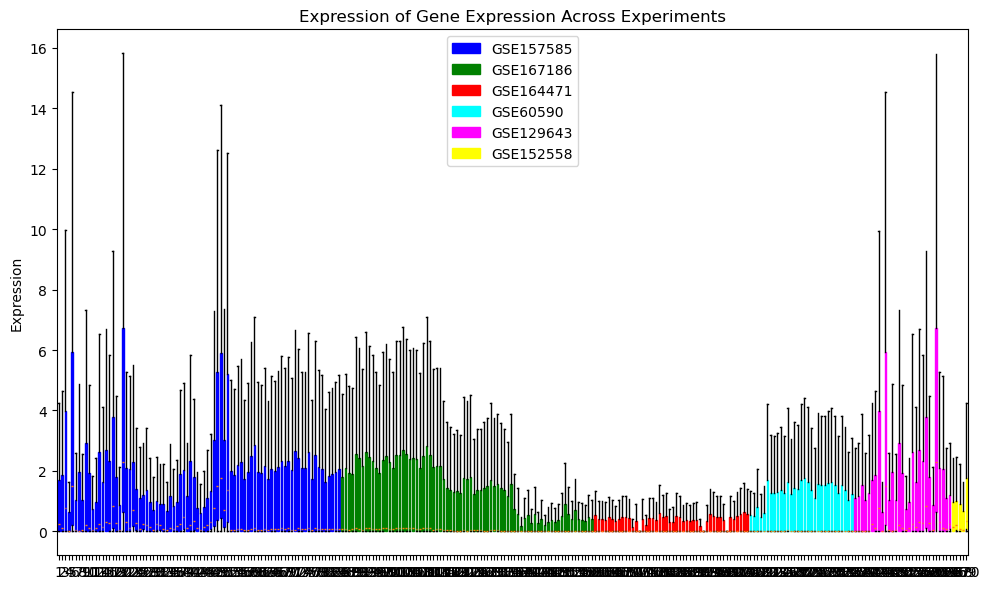

In [16]:

blot_expression(data, experiments, count_experiments, colors=colors, save=f"/home/karen/Documents/phd/Plots/expression_distribution_{technology}_unalteraded.png")



In [17]:

data = (data - data.mean()) / data.std()

data.fillna(0, inplace=True)

In [18]:
data.columns

Index(['SRR13388732', 'SRR13388733', 'SRR13388734', 'SRR13388735',
       'SRR13388736', 'SRR13388737', 'SRR13388738', 'SRR13388739',
       'SRR13388740', 'SRR13388741',
       ...
       'SRR8882190', 'SRR8882191', 'SRR8882192', 'SRR8882195', 'SRR8882196',
       'SRR8882198', 'SRR8882200', 'SRR8882202', 'SRR8882203', 'SRR8882219'],
      dtype='object', name='Sample', length=270)

In [19]:
data[data.isna().any(axis=1)]

Sample,SRR13388732,SRR13388733,SRR13388734,SRR13388735,SRR13388736,SRR13388737,SRR13388738,SRR13388739,SRR13388740,SRR13388741,...,SRR8882190,SRR8882191,SRR8882192,SRR8882195,SRR8882196,SRR8882198,SRR8882200,SRR8882202,SRR8882203,SRR8882219


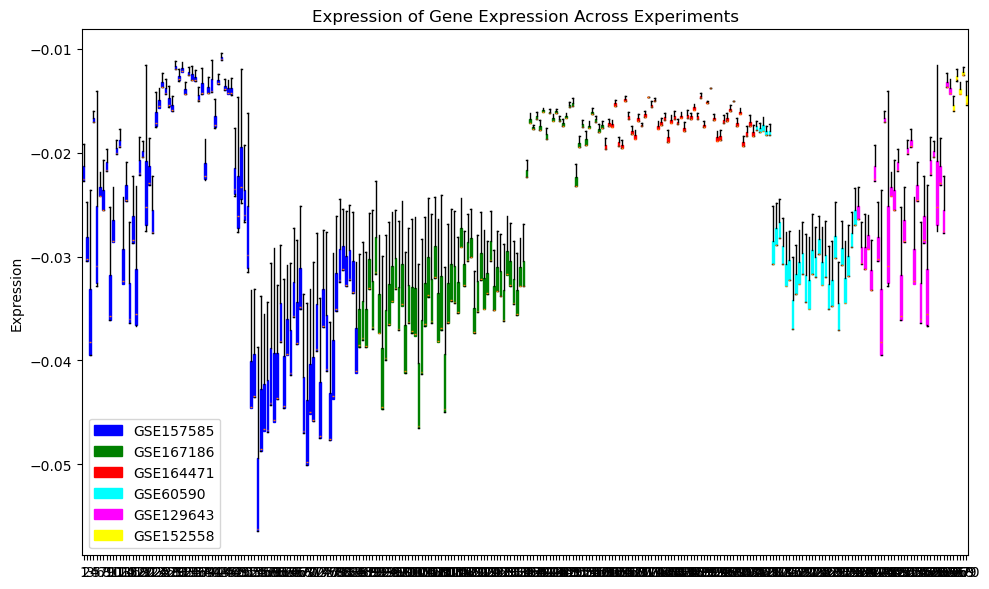

In [20]:
blot_expression(data, experiments, count_experiments, colors=colors, save=f"/home/karen/Documents/phd/Plots/expression_distribution_{technology}_combat_normalized.png")

In [21]:
age_list

0      23.0
1      28.0
2      31.0
3      31.0
4      35.0
       ... 
265    27.0
266    33.0
267    37.0
268    38.0
269    72.0
Name: Age, Length: 270, dtype: float64

In [22]:
batch_info

0      GSE164471
1      GSE164471
2      GSE164471
3      GSE164471
4      GSE164471
         ...    
265    GSE129643
266    GSE129643
267    GSE129643
268    GSE129643
269    GSE129643
Name: Experiment, Length: 270, dtype: object

In [23]:
data

Sample,SRR13388732,SRR13388733,SRR13388734,SRR13388735,SRR13388736,SRR13388737,SRR13388738,SRR13388739,SRR13388740,SRR13388741,...,SRR8882190,SRR8882191,SRR8882192,SRR8882195,SRR8882196,SRR8882198,SRR8882200,SRR8882202,SRR8882203,SRR8882219
ENSG00000000003.14,-0.019945,-0.021474,-0.027244,-0.015458,-0.012505,-0.021658,-0.020410,-0.018321,-0.029712,-0.023722,...,-0.013540,-0.020061,-0.024260,-0.012577,-0.012732,-0.014899,-0.012002,-0.013633,-0.012044,-0.014223
ENSG00000000005.5,-0.022699,-0.030376,-0.036875,-0.016925,-0.032016,-0.024174,-0.025551,-0.021723,-0.036062,-0.028005,...,-0.026891,-0.023140,-0.026934,-0.013698,-0.014245,-0.015944,-0.013044,-0.014339,-0.012521,-0.015102
ENSG00000000419.12,-0.016919,-0.013524,-0.009650,-0.012769,-0.014582,-0.017378,-0.005941,-0.014242,-0.017971,-0.015232,...,-0.022871,-0.011344,-0.017907,-0.011138,-0.010860,-0.014480,-0.012063,-0.011673,-0.011044,-0.012294
ENSG00000000457.13,-0.022119,-0.024452,-0.034146,-0.016488,-0.028775,-0.023381,-0.021239,-0.020325,-0.030124,-0.025721,...,-0.023353,-0.021352,-0.024625,-0.012525,-0.013726,-0.015592,-0.012630,-0.013605,-0.011708,-0.014191
ENSG00000000460.16,-0.019507,-0.026882,-0.024127,-0.015993,-0.019309,-0.021414,-0.021425,-0.019926,-0.028292,-0.020576,...,-0.003892,-0.019378,-0.023615,-0.012651,-0.013166,-0.015032,-0.011943,-0.013699,-0.012337,-0.013641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285480.1,-0.022699,-0.030376,-0.039462,-0.017040,-0.032318,-0.023451,-0.023258,-0.021723,-0.036062,-0.028600,...,-0.027561,-0.022912,-0.025973,-0.013698,-0.014375,-0.015869,-0.013044,-0.014321,-0.012521,-0.015439
ENSG00000285491.1,-0.022699,-0.030376,-0.038796,-0.017040,-0.032808,-0.024174,-0.025551,-0.021723,-0.036062,-0.028600,...,-0.026426,-0.023140,-0.027708,-0.013698,-0.014375,-0.015878,-0.013008,-0.014369,-0.012521,-0.015086
ENSG00000285505.1,-0.022699,-0.030376,-0.039462,-0.017040,-0.032808,-0.024174,-0.025551,-0.021723,-0.036062,-0.028600,...,-0.027561,-0.023093,-0.027708,-0.013698,-0.014375,-0.015931,-0.013044,-0.014369,-0.012521,-0.015394
ENSG00000285508.1,-0.018902,-0.013662,-0.035684,-0.013806,-0.028431,-0.019287,-0.025551,-0.020104,-0.029194,-0.024663,...,-0.025732,-0.020898,-0.025750,-0.013056,-0.014277,-0.015081,-0.012343,-0.013149,-0.011244,-0.015439


In [24]:
data_corrected = pycombat(data=data,batch=batch_info, mod=[], precision=0.1)

Found 6 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


In [25]:
data_corrected

Sample,SRR13388732,SRR13388733,SRR13388734,SRR13388735,SRR13388736,SRR13388737,SRR13388738,SRR13388739,SRR13388740,SRR13388741,...,SRR8882190,SRR8882191,SRR8882192,SRR8882195,SRR8882196,SRR8882198,SRR8882200,SRR8882202,SRR8882203,SRR8882219
ENSG00000000003.14,-0.025109,-0.026260,-0.030608,-0.021728,-0.019503,-0.026399,-0.025459,-0.023885,-0.032467,-0.027954,...,-0.018750,-0.023549,-0.026640,-0.018041,-0.018156,-0.019750,-0.017618,-0.018818,-0.017649,-0.019253
ENSG00000000005.5,-0.028258,-0.033508,-0.037952,-0.024309,-0.034629,-0.029267,-0.030208,-0.027590,-0.037396,-0.031887,...,-0.028793,-0.026237,-0.028823,-0.019800,-0.020173,-0.021331,-0.019354,-0.020237,-0.018998,-0.020757
ENSG00000000419.12,-0.005872,-0.004524,-0.002987,-0.004225,-0.004944,-0.006053,-0.001516,-0.004809,-0.006289,-0.005202,...,-0.009059,-0.003618,-0.006715,-0.003521,-0.003390,-0.005098,-0.003957,-0.003773,-0.003477,-0.004066
ENSG00000000457.13,-0.026729,-0.028312,-0.034886,-0.022910,-0.031244,-0.027585,-0.026133,-0.025513,-0.032159,-0.029172,...,-0.025566,-0.024198,-0.026436,-0.018163,-0.018984,-0.020260,-0.018234,-0.018901,-0.017604,-0.019302
ENSG00000000460.16,-0.026472,-0.031995,-0.029932,-0.023840,-0.026323,-0.027900,-0.027908,-0.026785,-0.033051,-0.027272,...,-0.013371,-0.024558,-0.027620,-0.019699,-0.020071,-0.021419,-0.019187,-0.020455,-0.019472,-0.020413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285480.1,-0.027546,-0.032635,-0.038657,-0.023795,-0.033922,-0.028044,-0.027916,-0.026899,-0.036403,-0.031457,...,-0.028538,-0.025482,-0.027494,-0.019424,-0.019869,-0.020852,-0.018994,-0.019834,-0.018651,-0.020569
ENSG00000285491.1,-0.028289,-0.033518,-0.039251,-0.024435,-0.035173,-0.029294,-0.030232,-0.027625,-0.037389,-0.032308,...,-0.028488,-0.026262,-0.029356,-0.019864,-0.020323,-0.021341,-0.019396,-0.020319,-0.019067,-0.020804
ENSG00000285505.1,-0.028272,-0.033482,-0.039648,-0.024431,-0.035132,-0.029273,-0.030207,-0.027609,-0.037341,-0.032277,...,-0.029223,-0.026207,-0.029322,-0.019866,-0.020322,-0.021372,-0.019424,-0.020318,-0.019071,-0.021010
ENSG00000285508.1,-0.024716,-0.020903,-0.036926,-0.021008,-0.031649,-0.024996,-0.029553,-0.025591,-0.032204,-0.028907,...,-0.027632,-0.024190,-0.027644,-0.018608,-0.019477,-0.020049,-0.018100,-0.018674,-0.017318,-0.020304


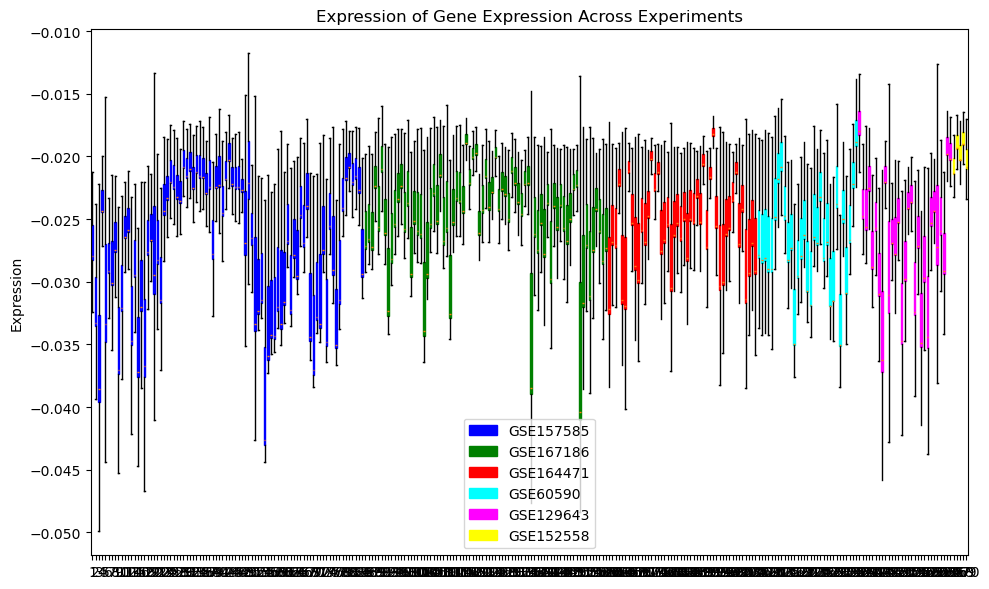

In [26]:
blot_expression(data_corrected, experiments, count_experiments, colors=colors, save=f"/home/karen/Documents/phd/Plots/expression_distribution_{technology}_adjustedCombat.png")

In [27]:
#blot_expression(data_corrected, experiments, count_experiments, colors=["blue", "green", "orange", "pink","red","purple"])

In [28]:
data_corrected = data_corrected.T

# Testing batch correction

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Set significance threshold (alpha level)

def plot_batch_correction_p_values(p_values_before, p_values_after, alpha = 0.05):
    # Plot histograms of p-values before and after batch correction
    plt.figure(figsize=(10, 5))
    plt.hist(p_values_before, bins=50, color='blue', alpha=0.5, label='Before Correction')
    plt.hist(p_values_after, bins=50, color='green', alpha=0.5, label='After Correction')
    plt.axvline(alpha, color='red', linestyle='--', label='Significance Threshold')
    plt.xlabel('p-value')
    plt.ylabel('Frequency')
    plt.title('Distribution of p-values before and after batch correction')
    plt.legend()
    plt.show()
    
    # Perform Kolmogorov-Smirnov test to compare distributions of p-values
    ks_stat, ks_p_value = ks_2samp(p_values_before, p_values_after)
    print("Kolmogorov-Smirnov test p-value:", ks_p_value)
    
    # Check if more p-values fall below the significance threshold after batch correction
    num_sig_before = np.sum(p_values_before < alpha)
    num_sig_after = np.sum(p_values_after < alpha)
    
    print("Number of significant p-values before correction:", num_sig_before)
    print("Number of significant p-values after correction:", num_sig_after)

def see_distribution(p_values_before, p_values_after):

    # Plot histograms of p-values before and after batch correction
    plt.figure(figsize=(10, 5))
    sns.histplot(p_values_before, bins=50, color='blue', kde=True, label='Before Correction')
    sns.histplot(p_values_after, bins=50, color='green', kde=True, label='After Correction')
    plt.axvline(alpha, color='red', linestyle='--', label='Significance Threshold')
    plt.xlabel('p-value')
    plt.ylabel('Density')
    plt.title('Distribution of p-values before and after batch correction')
    plt.legend()
    plt.show()


In [30]:
def get_ks_values_before_after(data, data_corrected, experiment_1, experiment_2):
    data_before = data.copy()
    data_before = data_before.T
    data_before.reset_index(drop=True, inplace=True)
    
    group_a_samples_before = data_before[cts['Experiment'] == experiment_1]
    group_b_samples_before = data_before[cts['Experiment'] == experiment_2]
    _, p_values_before = ttest_ind(group_a_samples_before, group_b_samples_before)
    ks_stat_before, ks_p_value_before = ks_2samp(group_a_samples_before, group_b_samples_before)

    data_corrected.reset_index(drop=True, inplace=True)

    group_a_samples_corrected = data_corrected[cts['Experiment'] == experiment_1]
    group_b_samples_corrected = data_corrected[cts['Experiment'] == experiment_2]
    _, p_values_after = ttest_ind(group_a_samples_corrected, group_b_samples_corrected)
    ks_stat_after, ks_p_value_after = ks_2samp(group_a_samples_corrected, group_b_samples_corrected)

    return ks_p_value_before, ks_p_value_after




In [31]:
def get_p_values_before_after(data, data_corrected, experiment_1, experiment_2):
    data_before = data.copy()
    data_before = data_before.T
    data_before.reset_index(drop=True, inplace=True)
    
    group_a_samples_before = data_before[cts['Experiment'] == experiment_1]
    group_b_samples_before = data_before[cts['Experiment'] == experiment_2]
    _, p_values_before = ttest_ind(group_a_samples_before, group_b_samples_before)

    data_corrected.reset_index(drop=True, inplace=True)

    group_a_samples_corrected = data_corrected[cts['Experiment'] == experiment_1]
    group_b_samples_corrected = data_corrected[cts['Experiment'] == experiment_2]
    _, p_values_after = ttest_ind(group_a_samples_corrected, group_b_samples_corrected)

    return p_values_before, p_values_after

In [32]:
experiment_list = experiments
experiments

['GSE157585', 'GSE167186', 'GSE164471', 'GSE60590', 'GSE129643', 'GSE152558']

In [33]:
experiment_1 = experiments[0]
experiment_2 = experiments[1]

In [34]:
# Perform differential expression analysis after batch correction



In [35]:
p_values_before, p_values_after = get_p_values_before_after(data, data_corrected, experiment_1, experiment_2)

In [36]:
p_values_before

array([7.15796945e-71, 3.49777195e-69, 9.16721561e-50, ...,
       3.83553752e-69, 1.88434724e-73, 7.15148449e-69])

In [37]:
p_values_after

array([9.24968345e-01, 9.53538092e-01, 1.70299825e-17, ...,
       9.56385333e-01, 9.00632597e-01, 9.52262707e-01])

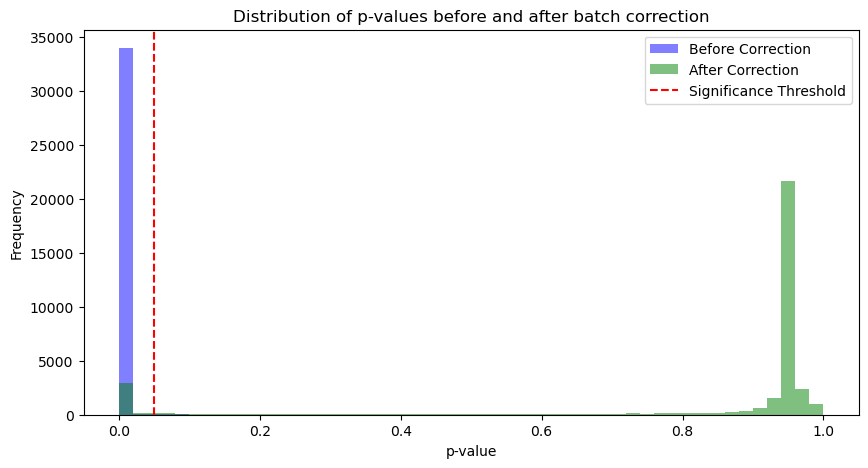

Kolmogorov-Smirnov test p-value: 0.0
Number of significant p-values before correction: 34067
Number of significant p-values after correction: 3244


In [38]:
plot_batch_correction_p_values(p_values_before, p_values_after, alpha = 0.05)


In [39]:
p_values_after

array([9.24968345e-01, 9.53538092e-01, 1.70299825e-17, ...,
       9.56385333e-01, 9.00632597e-01, 9.52262707e-01])

## Getting all the experiments p_values


In [40]:
import itertools


In [41]:
expriments_pvalue_before=[]
expriments_pvalue_after=[]
combination_list = []
ks_stats =  []

for experiment_1, experiment_2 in itertools.combinations(experiment_list, 2):
    combination_list.append(f"{experiment_1}-{experiment_2}")
    p_values_before, p_values_after = get_p_values_before_after(data, data_corrected, experiment_1, experiment_2)
    expriments_pvalue_before.append(p_values_before)
    expriments_pvalue_after.append(p_values_after)
    ks_stat, ks_p_value = ks_2samp(p_values_before, p_values_after)
    ks_stats.append({"combination":f"{experiment_1}-{experiment_2}","ks_stat":ks_stat, "ks_pvalue": ks_p_value})



In [42]:
# Convert lists to arrays
expriments_pvalue_before_array = np.array(expriments_pvalue_before)
expriments_pvalue_after_array = np.array(expriments_pvalue_after)

# Calculate average and standard deviation for p-values before and after
avg_p_values_before = np.mean(expriments_pvalue_before_array, axis=1)
std_p_values_before = np.std(expriments_pvalue_before_array, axis=1)
avg_p_values_after = np.mean(expriments_pvalue_after_array, axis=1)
std_p_values_after = np.std(expriments_pvalue_after_array, axis=1)

# Create DataFrame for KS test results
ks_stats_df = pd.DataFrame(ks_stats)


# Add columns for average and standard deviation of p-values before and after
ks_stats_df["avg_p_values_before"] = avg_p_values_before
ks_stats_df["std_p_values_before"] = std_p_values_before
ks_stats_df["avg_p_values_after"] = avg_p_values_after
ks_stats_df["std_p_values_after"] = std_p_values_after


In [43]:
ks_stats_df.drop(columns=["ks_stat", "ks_pvalue"])

,combination,avg_p_values_before,std_p_values_before,avg_p_values_after,std_p_values_after
0,GSE157585-GSE167186,0.005000,0.053349,0.818977,0.305848
1,GSE157585-GSE164471,0.008895,0.071536,0.798085,0.267176
2,GSE157585-GSE60590,0.024618,0.117357,0.881778,0.226069
3,GSE157585-GSE129643,0.011611,0.082365,0.789846,0.287146
4,GSE157585-GSE152558,0.024742,0.116121,0.784450,0.317286
5,GSE167186-GSE164471,0.038595,0.138163,0.848787,0.220631
6,GSE167186-GSE60590,0.004136,0.048732,0.816853,0.303577
7,GSE167186-GSE129643,0.020515,0.107411,0.807267,0.283269
8,GSE167186-GSE152558,0.020305,0.106510,0.758693,0.326608
9,GSE164471-GSE60590,0.010871,0.077427,0.812821,0.263167


In [44]:
ks_stats_df.to_csv(f"ttstat_difference_{technology}_experiments_before_after_combat.csv")

Heatmap the similarity of the experiments

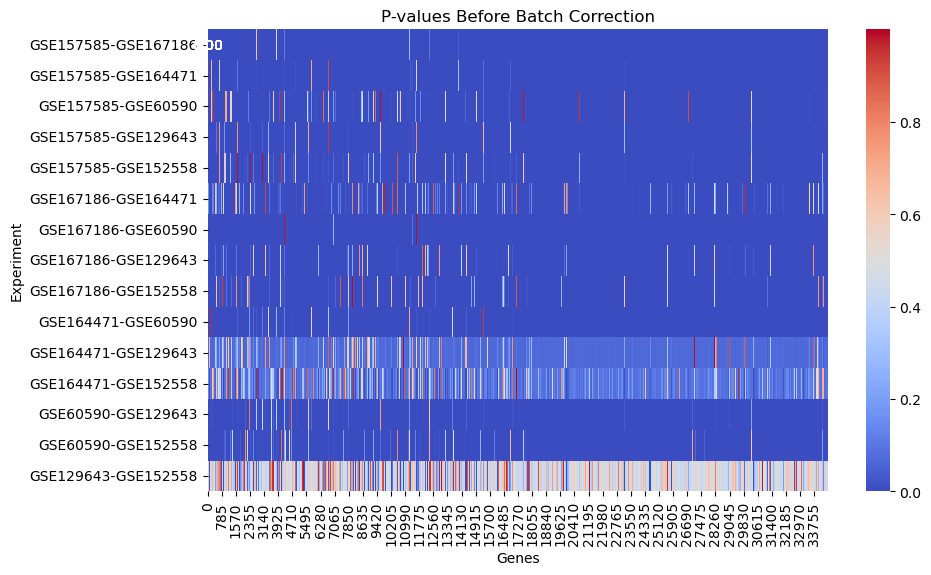

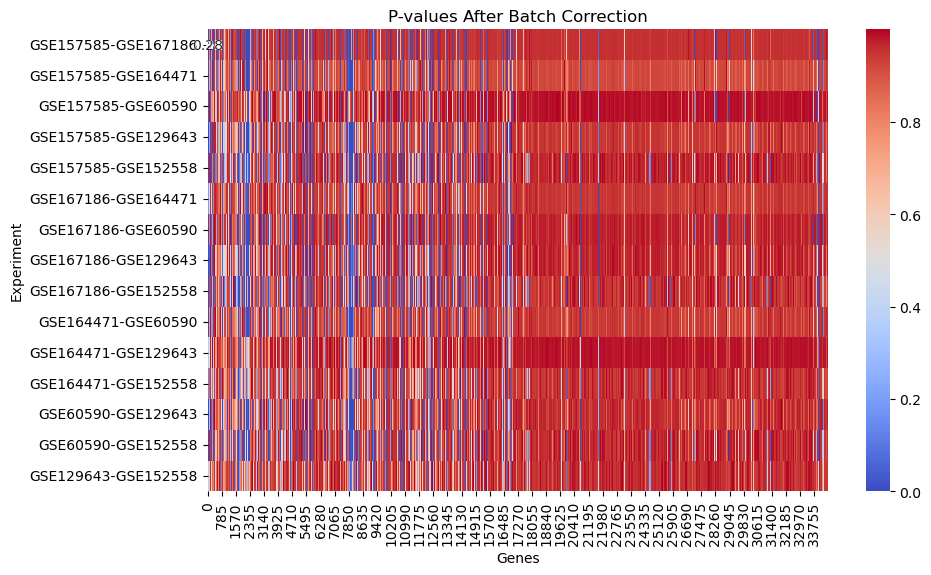

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert lists of p-values to a 2D NumPy array
p_values_before_array = np.array(expriments_pvalue_before)
p_values_after_array = np.array(expriments_pvalue_after)

# Create a heatmap for p-values before batch correction
plt.figure(figsize=(10, 6))
sns.heatmap(p_values_before_array, cmap='coolwarm', annot=True, fmt=".2f", yticklabels=combination_list)
plt.title('P-values Before Batch Correction')
plt.xlabel('Genes')
plt.ylabel('Experiment')
plt.savefig(f"/home/karen/Documents/phd/Plots/expression_distribution_{technology}_heatmap_before.png")
plt.show()

# Create a heatmap for p-values after batch correction
plt.figure(figsize=(10, 6))
sns.heatmap(p_values_after_array, cmap='coolwarm', annot=True, fmt=".2f", yticklabels=combination_list)
plt.title('P-values After Batch Correction')
plt.xlabel('Genes')
plt.ylabel('Experiment')
plt.savefig(f"/home/karen/Documents/phd/Plots/expression_distribution_{technology}_heatmap_after.png")
plt.show()

### Looking with the DE genes only

DE only in one experiment

In [48]:
import pandas as pd
experiment="GSE157585"

def get_columns_to_keep_one(experiment):
    # Path to the CSV file
    file_path = f'/home/karen/Documents/phd/Data/Expression_data/Differential Expression/{experiment}_DDS.csv'
    
    # Read the CSV file
    de_genes = pd.read_csv(file_path, index_col=0)
    
    # Filter rows based on condition
    filtered_data = de_genes[(abs(de_genes['log2FoldChange']) > 1) & (de_genes['padj'] < 0.1)]
    
    # Extract column names from filtered data
    columns_to_keep = filtered_data["row"].str.strip().tolist()
    return columns_to_keep

# Assuming p_values_before is another DataFrame you want to filter columns from
# Replace p_values_before with your DataFrame name
#filtered_columns = p_values_before[columns_to_keep]

# Now you can work with the filtered columns DataFrame as needed


In [49]:
if technology =="RNAseq":
    columns_to_keep = get_columns_to_keep_one(experiment)

In [50]:
if technology =="RNAseq":
    len(columns_to_keep)

In [51]:
#filter_Bools = [(abs(de_genes['log2FoldChange']) > 1) & (de_genes['padj'] < 0.1)][0]

In [52]:
#p_values_after[x]

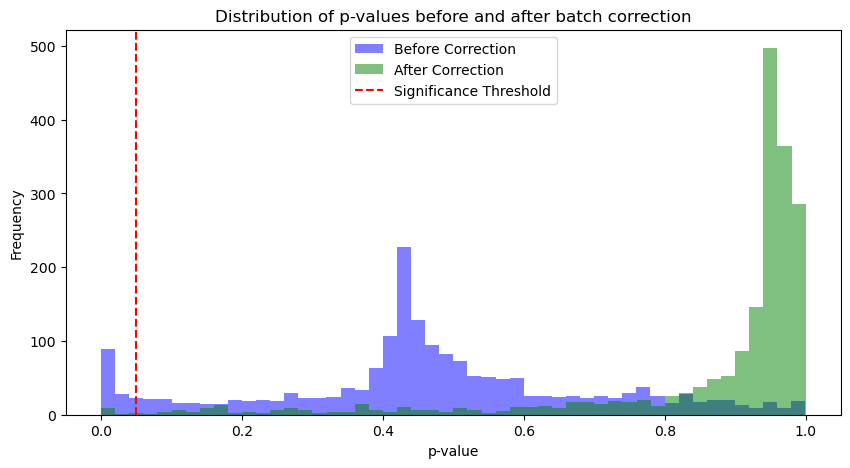

Kolmogorov-Smirnov test p-value: 0.0
Number of significant p-values before correction: 133
Number of significant p-values after correction: 11


In [53]:
if technology =="RNAseq":

    DE_data = data.copy()
    DE_data_corrected = data_corrected.copy()
    
    DE_data= DE_data.T
    DE_data = DE_data[columns_to_keep]
    DE_data_corrected = DE_data_corrected[columns_to_keep]
    DE_data= DE_data.T
    
    p_values_before, p_values_after = get_p_values_before_after(DE_data, DE_data_corrected, experiment_1, experiment_2)
    plot_batch_correction_p_values(p_values_before, p_values_after, alpha = 0.05)


In [54]:
if technology =="RNAseq":
    DE_data_corrected

In [55]:
if technology =="RNAseq":
    DE_data

In [56]:
if technology =="RNAseq":
    DE_data.columns

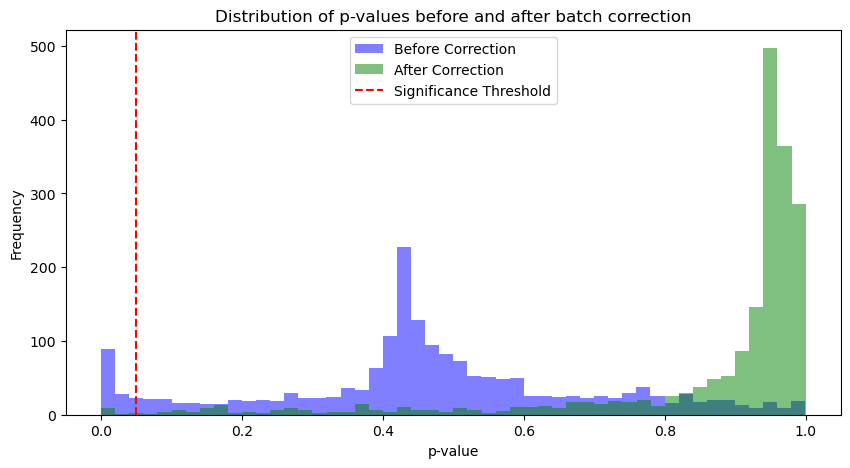

Kolmogorov-Smirnov test p-value: 0.0
Number of significant p-values before correction: 133
Number of significant p-values after correction: 11


In [57]:
if technology =="RNAseq":

    
    data_before = data.copy()
    data_before = data_before.T
    
    data_before.reset_index(drop=True, inplace=True)
    
    group_a_samples_before = data_before[cts['Experiment'] == experiment_1]
    
    group_b_samples_before = data_before[cts['Experiment'] == experiment_2]
    group_a_samples_before.columns=data.index
    group_b_samples_before.columns=data.index
    group_a_samples_before = group_a_samples_before[columns_to_keep]
    group_b_samples_before = group_b_samples_before[columns_to_keep]
    _, p_values_before = ttest_ind(group_a_samples_before, group_b_samples_before)
    
    
    data_corrected.reset_index(drop=True, inplace=True)
    
    group_a_samples_corrected = data_corrected[cts['Experiment'] == experiment_1]
    group_b_samples_corrected = data_corrected[cts['Experiment'] == experiment_2]
    
    group_a_samples_corrected.columns=data.index
    group_b_samples_corrected.columns=data.index
    group_a_samples_corrected = group_a_samples_corrected[columns_to_keep]
    group_b_samples_corrected = group_b_samples_corrected[columns_to_keep]
    t_statistic, p_values_after = ttest_ind(group_a_samples_corrected, group_b_samples_corrected)
    plot_batch_correction_p_values(p_values_before, p_values_after, alpha = 0.05)


## Checking random genes

In [58]:
import random
if technology =="RNAseq":
    random_values = random.sample(de_genes["row"].tolist(), len(columns_to_keep))


NameError: name 'de_genes' is not defined

In [ ]:
if technology =="RNAseq":
    
    data_before = data.copy()
    data_before = data_before.T
    
    data_before.reset_index(drop=True, inplace=True)
    
    group_a_samples_before = data_before[cts['Experiment'] == experiment_1]
    
    group_b_samples_before = data_before[cts['Experiment'] == experiment_2]
    group_a_samples_before.columns=data.index
    group_b_samples_before.columns=data.index
    group_a_samples_before = group_a_samples_before[random_values]
    group_b_samples_before = group_b_samples_before[random_values]
    _, p_values_before = ttest_ind(group_a_samples_before, group_b_samples_before)
    
    
    data_corrected.reset_index(drop=True, inplace=True)
    
    group_a_samples_corrected = data_corrected[cts['Experiment'] == experiment_1]
    group_b_samples_corrected = data_corrected[cts['Experiment'] == experiment_2]
    
    group_a_samples_corrected.columns=data.index
    group_b_samples_corrected.columns=data.index
    group_a_samples_corrected = group_a_samples_corrected[random_values]
    group_b_samples_corrected = group_b_samples_corrected[random_values]
    t_statistic, p_values_after = ttest_ind(group_a_samples_corrected, group_b_samples_corrected)
    plot_batch_correction_p_values(p_values_before, p_values_after, alpha = 0.05)

## checking DE in both groups

In [ ]:
import pandas as pd
if technology =="RNAseq":
    
    # Path to the CSV file
    file_path_1 = f'/home/karen/Documents/phd/Data/Expression_data/Differential Expression/{experiment_1}_DDS.csv'
    file_path_2 = f'/home/karen/Documents/phd/Data/Expression_data/Differential Expression/{experiment_2}_DDS.csv'
    
    # Read the CSV file
    de_genes_1 = pd.read_csv(file_path_1, index_col=0)
    de_genes_2 = pd.read_csv(file_path_2, index_col=0)
    
    # Filter rows based on condition
    filtered_data_1 = de_genes_1[(abs(de_genes_1['log2FoldChange']) > 1) & (de_genes_1['padj'] < 0.1)]
    filtered_data_2 = de_genes_2[(abs(de_genes_2['log2FoldChange']) > 1) & (de_genes_2['padj'] < 0.1)]
    
    union_filter = pd.concat([filtered_data_1, filtered_data_2]).drop_duplicates()
    intersection_filter = pd.merge(filtered_data_1, filtered_data_2, on='row', how='inner')
    
    # Extract column names from filtered data
    union_keep = union_filter["row"].str.strip().tolist()
    intersection_keep = intersection_filter["row"].str.strip().tolist()


In [ ]:
if technology =="RNAseq":
    
    
    data_before = data.copy()
    data_before = data_before.T
    
    data_before.reset_index(drop=True, inplace=True)
    
    group_a_samples_before = data_before[cts['Experiment'] == experiment_1]
    
    group_b_samples_before = data_before[cts['Experiment'] == experiment_2]
    group_a_samples_before.columns=data.index
    group_b_samples_before.columns=data.index
    group_a_samples_before = group_a_samples_before[intersection_keep]
    group_b_samples_before = group_b_samples_before[intersection_keep]
    _, p_values_before = ttest_ind(group_a_samples_before, group_b_samples_before)
    
    
    data_corrected.reset_index(drop=True, inplace=True)
    
    group_a_samples_corrected = data_corrected[cts['Experiment'] == experiment_1]
    group_b_samples_corrected = data_corrected[cts['Experiment'] == experiment_2]
    
    group_a_samples_corrected.columns=data.index
    group_b_samples_corrected.columns=data.index
    group_a_samples_corrected = group_a_samples_corrected[intersection_keep]
    group_b_samples_corrected = group_b_samples_corrected[intersection_keep]
    t_statistic, p_values_after = ttest_ind(group_a_samples_corrected, group_b_samples_corrected)
    plot_batch_correction_p_values(p_values_before, p_values_after, alpha = 0.05)

Checking the same experiment before and after

In [ ]:
if technology =="RNAseq":
    
    t_statistic, p_values_a = ttest_ind(group_a_samples_before, group_a_samples_corrected)
    t_statistic, p_values_b = ttest_ind(group_b_samples_before, group_b_samples_corrected)
    plot_batch_correction_p_values(p_values_a, p_values_b, alpha = 0.05)

# Cluster data before and after

In [59]:
metadata_short =  pd.DataFrame({
    'Experiment': experiment_order,
    'Age': age_order,
    'Sample': sample_order
})
metadata_short.set_index('Sample', inplace=True)
metadata_short

,Experiment,Age
Sample,,
SRR13388732,GSE164471,Young
SRR13388733,GSE164471,Young
SRR13388734,GSE164471,Young
SRR13388735,GSE164471,Young
SRR13388736,GSE164471,Young
...,...,...
SRR8882198,GSE129643,Young
SRR8882200,GSE129643,Young
SRR8882202,GSE129643,MiddleAge


In [60]:
data_corrected.index = cts["Sample"]

In [61]:
adjuested_data_full = pd.concat([data_corrected, metadata_short], axis=1)

In [62]:
unadjested_data_full= pd.concat([cts_processed, metadata_short], axis=1)

In [63]:
adjuested_data_full.columns[10:]

Index(['ENSG00000001460.17', 'ENSG00000001461.16', 'ENSG00000001497.16',
       'ENSG00000001617.11', 'ENSG00000001626.14', 'ENSG00000001629.9',
       'ENSG00000001630.15', 'ENSG00000001631.15', 'ENSG00000002016.17',
       'ENSG00000002079.14',
       ...
       'ENSG00000285471.1', 'ENSG00000285472.1', 'ENSG00000285476.1',
       'ENSG00000285480.1', 'ENSG00000285491.1', 'ENSG00000285505.1',
       'ENSG00000285508.1', 'ENSG00000285509.1', 'Experiment', 'Age'],
      dtype='object', length=34497)

In [64]:
cts_2 = cts.set_index("Sample")
cts_2

,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.11,ENSG00000001167.14,...,ENSG00000285472.1,ENSG00000285476.1,ENSG00000285480.1,ENSG00000285491.1,ENSG00000285505.1,ENSG00000285508.1,ENSG00000285509.1,Experiment,Age,Sample.1
Sample,,,,,,,,,,,,,,,,,,,,,
SRR13388732,3.346531,0.000000,7.023940,0.705439,3.879328,0.275243,7.746350,6.574690,8.136232,3.166290,...,0.311412,0.439481,0.000000,0.000000,0.000000,4.61464,0.142626,GSE164471,23.0,SRR13388732
SRR13388733,7.351350,0.000000,13.916237,4.891812,2.885359,0.190321,16.006573,6.498180,10.725815,7.545120,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.80200,1.119540,GSE164471,28.0,SRR13388733
SRR13388734,7.671751,1.624510,18.720030,3.338030,9.629021,0.204143,19.061782,7.368540,11.420381,6.801920,...,0.000000,0.167163,0.000000,0.418267,0.000000,2.37204,0.915094,GSE164471,31.0,SRR13388734
SRR13388735,2.547355,0.184514,6.876067,0.888782,1.684829,0.000000,3.182537,2.415355,2.242850,1.916299,...,0.000000,0.148800,0.000000,0.000000,0.000000,5.20632,0.813373,GSE164471,31.0,SRR13388735
SRR13388736,15.728966,0.613411,14.120093,3.123864,10.457990,0.198544,12.340000,19.441760,18.223213,3.726510,...,1.544910,1.069550,0.379249,0.000000,0.000000,3.39066,0.707502,GSE164471,35.0,SRR13388736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR8882198,1.832683,0.000000,2.567454,0.617939,1.599221,0.338734,2.457767,1.825564,5.485286,2.604403,...,0.043890,0.109543,0.131619,0.115910,0.023606,1.51306,0.347812,GSE129643,27.0,SRR8882198
SRR8882200,2.251713,0.000000,2.120141,0.895718,2.379145,0.418938,1.489740,2.676330,1.880811,0.663090,...,0.000000,0.156295,0.000000,0.078959,0.000000,1.51426,0.129535,GSE129643,33.0,SRR8882200
SRR8882202,1.387888,0.057285,5.080017,1.439485,1.263484,0.194929,3.880208,2.066827,5.226251,2.951940,...,0.000000,0.000000,0.090303,0.000000,0.000000,2.29948,0.106928,GSE129643,37.0,SRR8882202


In [65]:
adjuested_data_full["Age"]=cts_2["Age"]
adjuested_data_full

,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.11,ENSG00000001167.14,...,ENSG00000285471.1,ENSG00000285472.1,ENSG00000285476.1,ENSG00000285480.1,ENSG00000285491.1,ENSG00000285505.1,ENSG00000285508.1,ENSG00000285509.1,Experiment,Age
Sample,,,,,,,,,,,,,,,,,,,,,
SRR13388732,-0.025109,-0.028258,-0.005872,-0.026729,-0.026472,-0.027634,-0.020870,-0.022772,-0.022661,-0.025610,...,-0.028169,-0.028120,-0.028027,-0.027546,-0.028289,-0.028272,-0.024716,-0.028265,GSE164471,23.0
SRR13388733,-0.026260,-0.033508,-0.004524,-0.028312,-0.031995,-0.032750,-0.016343,-0.026733,-0.023806,-0.026443,...,-0.033510,-0.033522,-0.033509,-0.032635,-0.033518,-0.033482,-0.020903,-0.032705,GSE164471,28.0
SRR13388734,-0.030608,-0.037952,-0.002987,-0.034886,-0.029932,-0.038745,-0.014741,-0.030696,-0.027022,-0.031814,...,-0.038155,-0.039709,-0.039524,-0.038657,-0.039251,-0.039648,-0.036926,-0.038901,GSE164471,31.0
SRR13388735,-0.021728,-0.024309,-0.004225,-0.022910,-0.023840,-0.024011,-0.019799,-0.021443,-0.022365,-0.022526,...,-0.024390,-0.024440,-0.024351,-0.023795,-0.024435,-0.024431,-0.021008,-0.024095,GSE164471,31.0
SRR13388736,-0.019503,-0.034629,-0.004944,-0.031244,-0.026323,-0.034354,-0.021341,-0.015501,-0.017102,-0.031354,...,-0.034285,-0.033820,-0.034226,-0.033922,-0.035173,-0.035132,-0.031649,-0.034687,GSE164471,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR8882198,-0.019750,-0.021331,-0.005098,-0.020260,-0.021419,-0.020946,-0.018419,-0.019666,-0.019176,-0.019744,...,-0.021333,-0.021377,-0.021335,-0.020852,-0.021341,-0.021372,-0.020049,-0.021263,GSE129643,27.0
SRR8882200,-0.017618,-0.019354,-0.003957,-0.018234,-0.019187,-0.019024,-0.016646,-0.017455,-0.018713,-0.018467,...,-0.019334,-0.019429,-0.019360,-0.018994,-0.019396,-0.019424,-0.018100,-0.019367,GSE129643,33.0
SRR8882202,-0.018818,-0.020237,-0.003773,-0.018901,-0.020455,-0.019962,-0.016610,-0.018502,-0.018296,-0.018516,...,-0.020258,-0.020326,-0.020308,-0.019834,-0.020319,-0.020318,-0.018674,-0.020279,GSE129643,37.0


In [66]:
adjuested_data_full.to_csv(f"/home/karen/Documents/GitHub/Test_DEG_methods-single_cell/batch_correction/{technology}_abundances_adjusted_combat.csv")

In [67]:
#unadjested_data_full.to_csv(f"/home/karen/Documents/GitHub/Test_DEG_methods-single_cell/batch_correction/{technology}_All_abundances_unadjusted_2.csv")

Looking at reCombat plotting

In [68]:
X = data_corrected.fillna(0, inplace=False).values 

In [69]:
X

array([[-0.02510878, -0.02825793, -0.00587165, ..., -0.02827187,
        -0.02471562, -0.02826487],
       [-0.02626031, -0.033508  , -0.00452442, ..., -0.03348231,
        -0.0209033 , -0.03270522],
       [-0.03060764, -0.03795191, -0.00298733, ..., -0.03964846,
        -0.0369261 , -0.03890068],
       ...,
       [-0.01881811, -0.02023679, -0.00377343, ..., -0.02031831,
        -0.01867367, -0.02027896],
       [-0.01764912, -0.01899782, -0.00347657, ..., -0.0190709 ,
        -0.01731779, -0.01901349],
       [-0.01925279, -0.02075699, -0.00406648, ..., -0.02100987,
        -0.02030375, -0.02090655]])

In [70]:

# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(experiment_order)}
if technology =="RNAseq":
    category_map = {'GSE164471': -1, 'GSE152558': 0, 'GSE157585': 1, 'GSE167186':2, "GSE60590":3, "GSE129643":4}
elif technology == "microarray":
    category_map = {'GSE13070':-6, 'GSE47969':-5, 'GSE48278':-4, 'GSE9103':-3, 'GSE59880':-2, 'GSE9676':-1, 'GSE161643':0, 'GSE8157':1, 'GSE1428':2, 'GSE38718':3, 'GSE6348':4, 'GSE40551':5, 'GSE87105':6, 'GSE674_2':7}
# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_experiment_order = [category_map[experiment] for experiment in experiment_order]

from matplotlib.colors import ListedColormap
tab20_colors = plt.cm.tab20.colors
num_colors = len(np.unique(experiment_order))
colors = [tab20_colors[i] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)


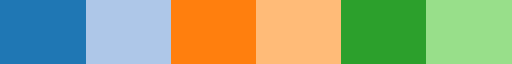

In [71]:
custom_cmap

Using tSNE


In [72]:
from sklearn.manifold import TSNE
X = data_corrected.values 
tSNE=TSNE(n_components=2)
tSNE_result=tSNE.fit_transform(X)
# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
x=tSNE_result[:,0]
y=tSNE_result[:,1]

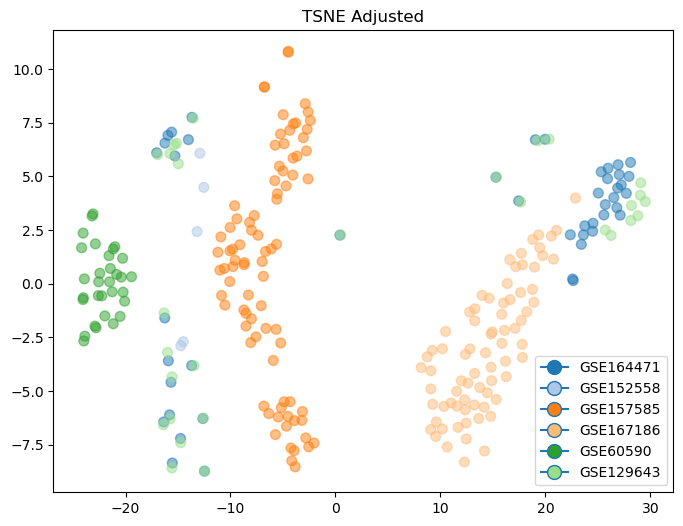

In [73]:

plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE Adjusted')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)

# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/TSNE_Scatter_Plot_Experiment_{technology}_Combat_by_experiment.png"
plt.savefig(save)

Using PCA

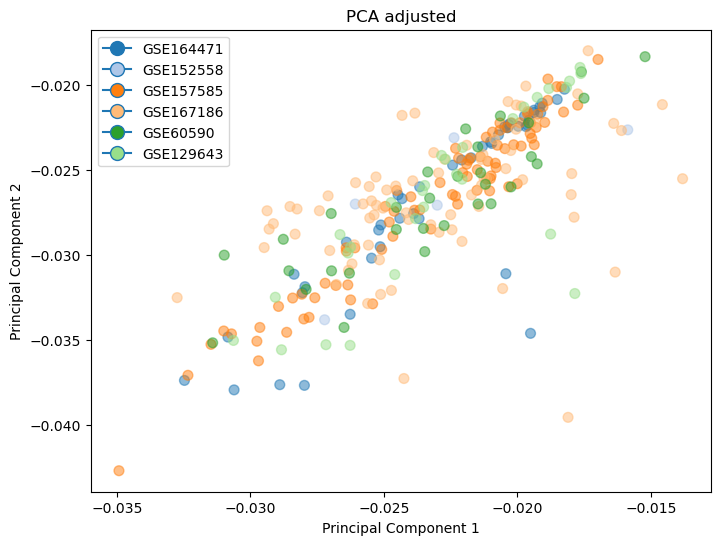

In [74]:

# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA adjusted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/PCA_Scatter_Plot_Experiment_{technology}_Combat_by_experiment.png"
plt.savefig(save)

Lookign at the age

In [75]:



# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(age_order)}
category_map = {'Young': -1,  'MiddleAge': 0, 'Old': 1}
# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_age_order = [category_map[experiment] for experiment in age_order]
tab20_colors = plt.cm.tab10.colors
num_colors = len(np.unique(age_order))
colors = [tab20_colors[i] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)


In [76]:
pd.DataFrame(age_order).value_counts()

Old          135
Young         93
MiddleAge     42
Name: count, dtype: int64

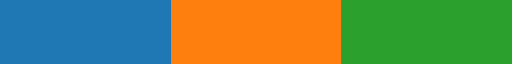

In [77]:
custom_cmap

tSNE

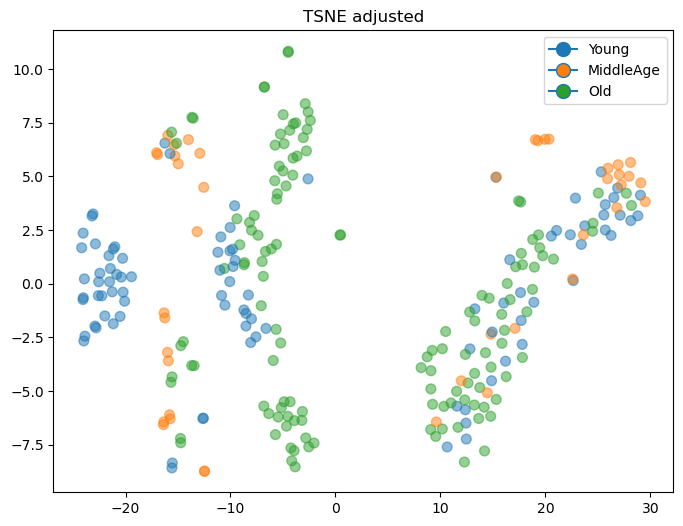

In [78]:

plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_age_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE adjusted')

# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/TSNE_Scatter_Plot_Experiment_{technology}_Combat_by_age.png"
plt.savefig(save)
#plt.savefig("TSNE_Scatter_Plot_Age_reCombat.jpg")

PCA

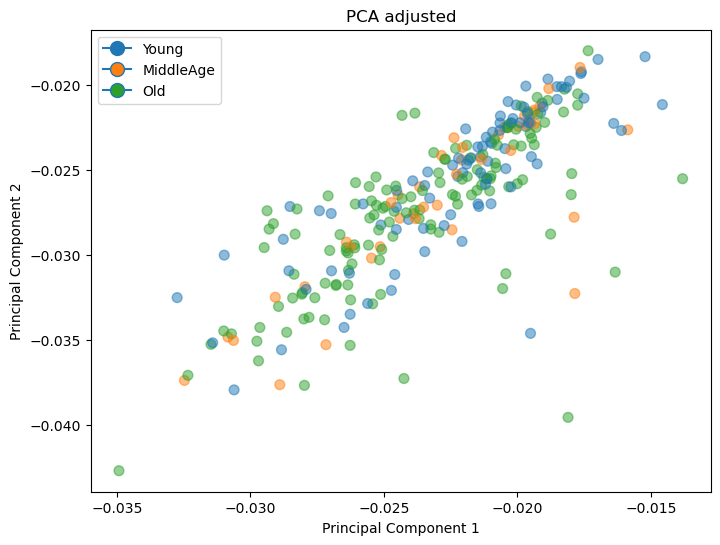

In [79]:

# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_age_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA adjusted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/PCA_Scatter_Plot_Experiment_{technology}_Combat_by_age.png"
plt.savefig(save)
# plt.savefig("PCA_Scatter_Plot_Age_reCombat.jpg")

Unadjusted

In [80]:
X = cts_processed.values 


tSNE by experiment

In [81]:

tSNE=TSNE(n_components=2)
tSNE_result=tSNE.fit_transform(X)
# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
x=tSNE_result[:,0]
y=tSNE_result[:,1]

In [82]:
# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(experiment_order)}
if technology =="RNAseq":
    category_map = {'GSE164471': -1, 'GSE152558': 0, 'GSE157585': 1, 'GSE167186':2, "GSE60590":3, "GSE129643":4}
elif technology == "microarray":
    category_map = {'GSE13070':-6, 'GSE47969':-5, 'GSE48278':-4, 'GSE9103':-3, 'GSE59880':-2, 'GSE9676':-1, 'GSE161643':0, 'GSE8157':1, 'GSE1428':2, 'GSE38718':3, 'GSE6348':4, 'GSE40551':5, 'GSE87105':6, 'GSE674_2':7}
# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_experiment_order = [category_map[experiment] for experiment in experiment_order]

from matplotlib.colors import ListedColormap
tab20_colors = plt.cm.tab20.colors
num_colors = len(np.unique(experiment_order))
colors = [tab20_colors[i ] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)

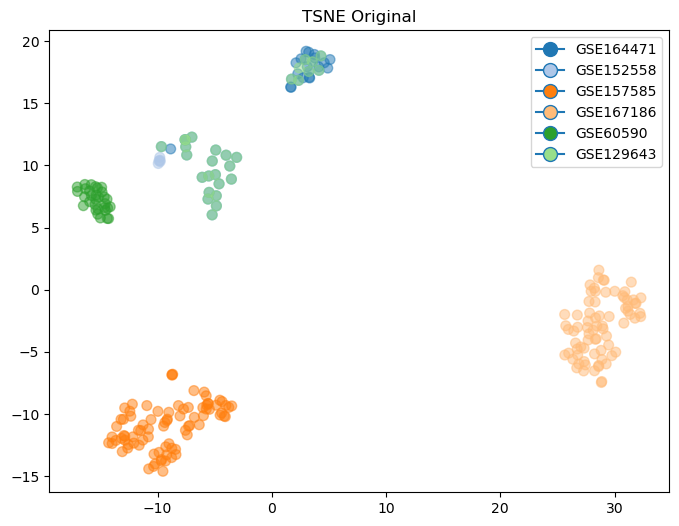

In [83]:

plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE Original')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)

# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/TSNE_Scatter_Plot_Experiment_{technology}_Original_by_experiment.png"
plt.savefig(save)
#plt.savefig("TSNE_Scatter_Plot_Experiment_Original.jpg")

PCA by experiment original

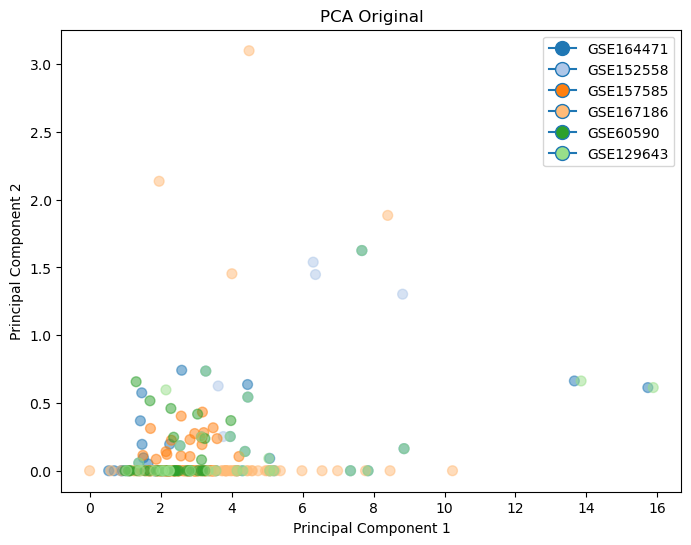

In [84]:

# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA Original')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/PCA_Scatter_Plot_Experiment_{technology}_Original_by_experiment.png"
plt.savefig(save)
#plt.savefig("PCA_Scatter_Plot_Experiment_Original.jpg")

By age

In [85]:

# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(age_order)}
category_map = {'Young': -1,  'MiddleAge': 0, 'Old': 1}
# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_age_order = [category_map[experiment] for experiment in age_order]
tab20_colors = plt.cm.tab10.colors
num_colors = len(np.unique(age_order))
colors = [tab20_colors[i % 20] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)

TSNE by age

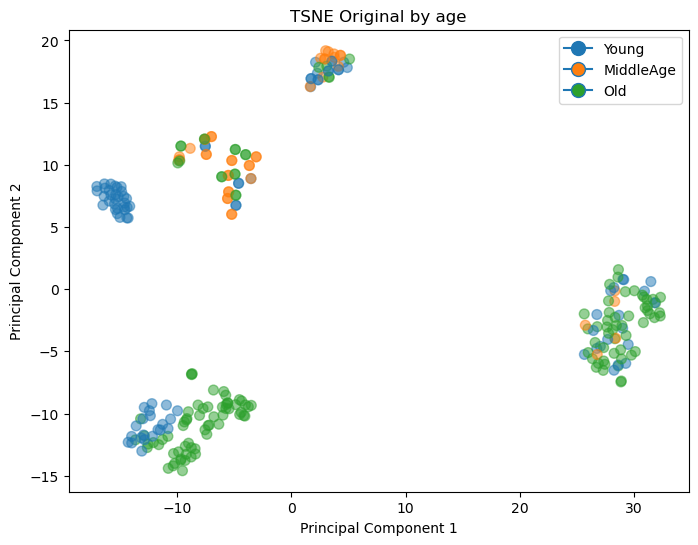

In [86]:


# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_age_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE Original by age')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/TSNE_Scatter_Plot_Experiment_{technology}_Original_by_age.png"
plt.savefig(save)
#plt.savefig("TSNE_Scatter_Plot_Age_Original.jpg")

PCA by age original

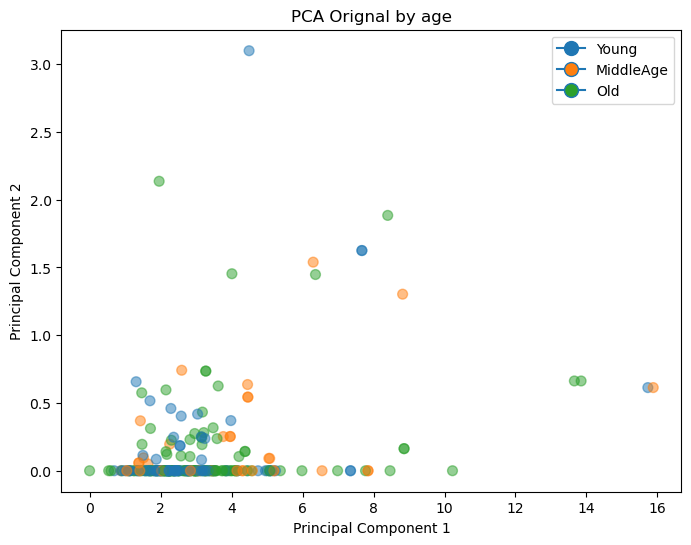

In [87]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_age_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA Orignal by age')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/PCA_Scatter_Plot_Experiment_{technology}_Original_by_age.png"
plt.savefig(save)
#plt.savefig("PCA_Scatter_Plot_Age_Original.jpg")

UMAP